# EXAMPLE: BUILDING A DECISION TREE MODEL with PYTHON

### Intro:
- In this analysis, I developed a decision tree model using the sample Invistico_Airline_Data sourced from Kaggle.com. The dataset comprises survey responses from 129,880 customers, including variables such as class, flight distance, and in-flight entertainment, etc.
- The primary business question is to predict whether future customers would be satisfied with the airline's services based on previous customer feedback regarding their flight experiences. The results indicate that 'Inflight entertainment,' 'Seat comfort,' and 'Ease of Online booking' are the most significant factors influencing customer satisfaction.

### 1. Import Packages and Data

In [116]:
# operational
import numpy as np
import pandas as pd

# modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/Users/cansezgin/Downloads/Invistico_Airline.csv")
data.head()

### 2. Data Preparation

In [26]:
# explore data
data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [28]:
data["Class"].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [30]:
# the counts of the predicted labels
data['satisfaction'].value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [32]:
# check for missing values
data.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [34]:
data.shape

(129880, 22)

In [36]:
# drop the rows with missing values
data_subset = data.dropna(axis = 0).reset_index(drop = True)

In [38]:
# control the missing values again
data_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [40]:
# check the structure of the dataset again
data_subset.shape

(129487, 22)

In [44]:
# encode the object columns into numeric values
data_subset['Class'] = data_subset['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1})

In [46]:
# represent target variables numerically
data_subset['satisfaction'] = data_subset['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

In [48]:
# convert categorical data into numeric
data_subset = pd.get_dummies(data_subset, drop_first = True)

In [52]:
data_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
dtype: obj

In [54]:
# create data for training and testing
y = data_subset["satisfaction"]
X = data_subset.copy()
X = X.drop("satisfaction", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 3. Model Building

In [57]:
# decision tree classifier model
decision_tree = DecisionTreeClassifier(random_state = 0)
decision_tree.fit(X_train, y_train)
data_pred = decision_tree.predict(X_test)

### 4. Results

In [68]:
# accuracy-precision-recall-f1
print("Desicion Tree Metrics")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, data_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, data_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, data_pred))
print("f1:", "%.6f" % metrics.f1_score(y_test, data_pred))

Desicion Tree Metrics
Accuracy: 0.935222
Precision: 0.942435
Recall: 0.939086
f1: 0.940758


- According to the metrics, there is a potential for overfitting. Therefore, hyperparameter tuning and grid search would be helpful to ensure this doesn't happen.

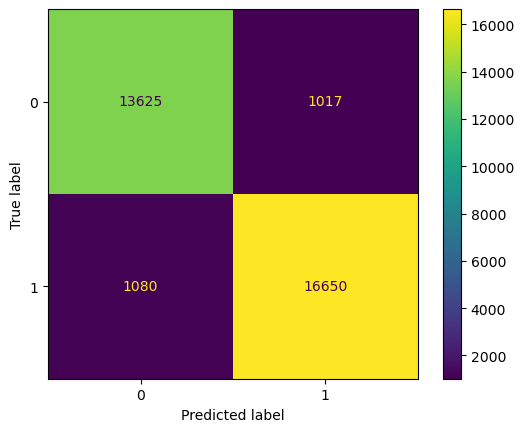

In [73]:
# create a confusion metrics
cm = metrics.confusion_matrix(y_test, data_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = decision_tree.classes_)
disp.plot()

- In the confusion matrix, the model shows a high proportion of accurate predictions for both satisfied and dissatisfied customers, indicating a strong presence of true positives and true negatives. 
- Additionally, there are relatively few incorrect predictions, meaning the numbers of false positives and false negatives are low, where the model mistakenly predicted customer satisfaction or dissatisfaction.

### 5. Decision Tree

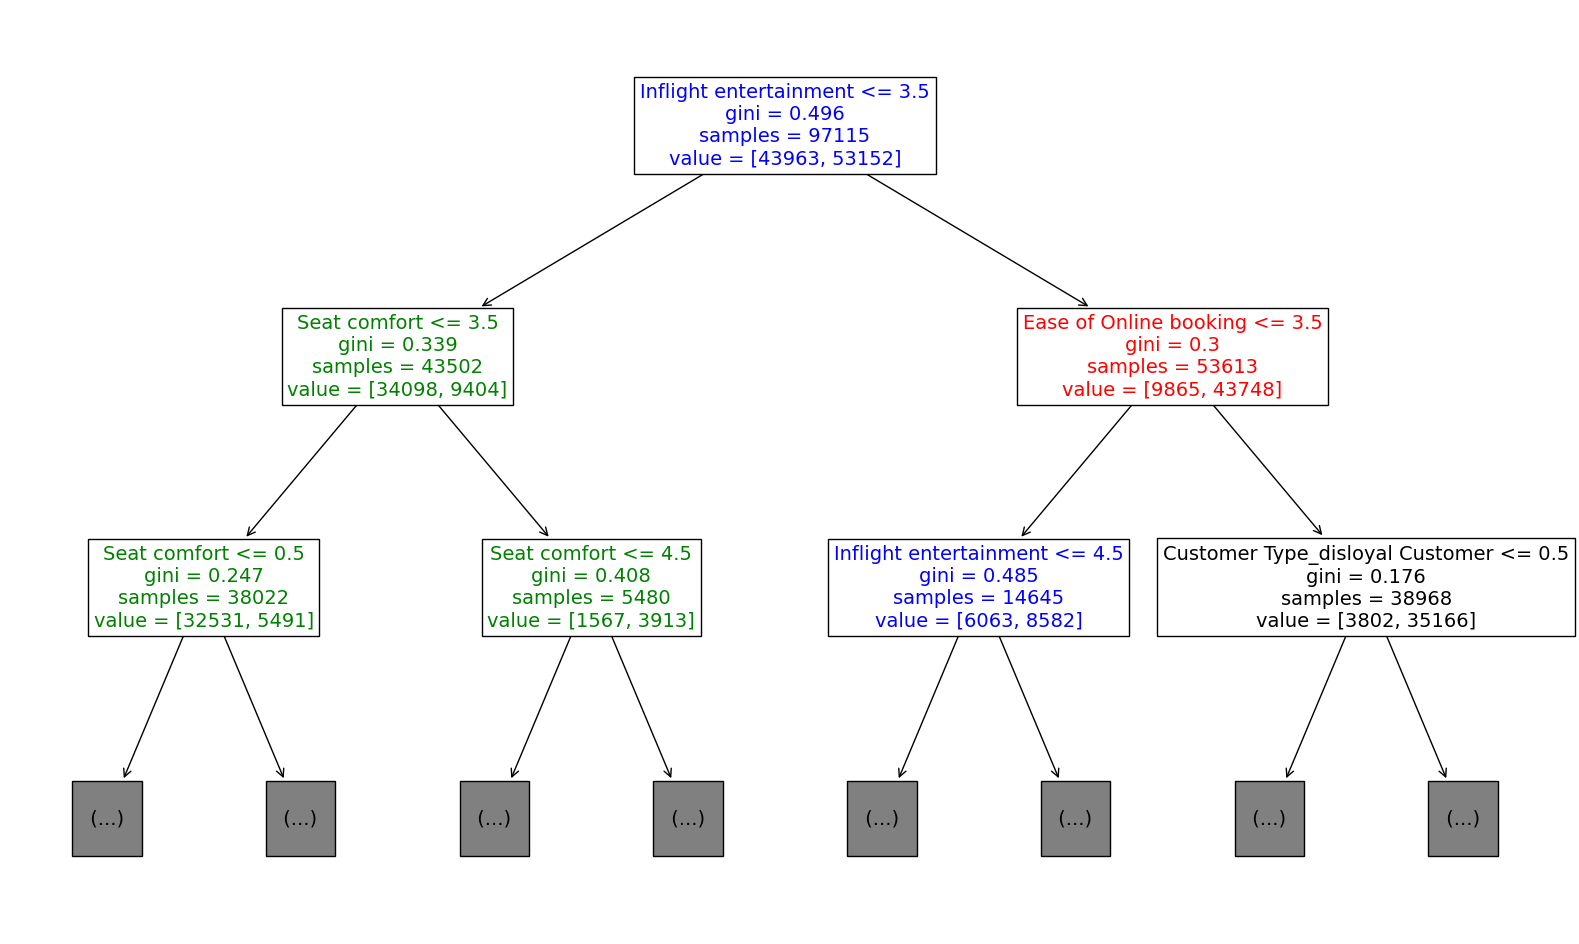

In [103]:
plt.figure(figsize=(20,12))
tree_plot = plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns)

# Add manual annotations to highlight the important features
for item in tree_plot:
    if 'Inflight entertainment' in item.get_text():
        item.set_color('blue')
    elif 'Seat comfort' in item.get_text():
        item.set_color('green')
    elif 'Ease of Online booking' in item.get_text():
        item.set_color('red')

# Show the plot
plt.show()

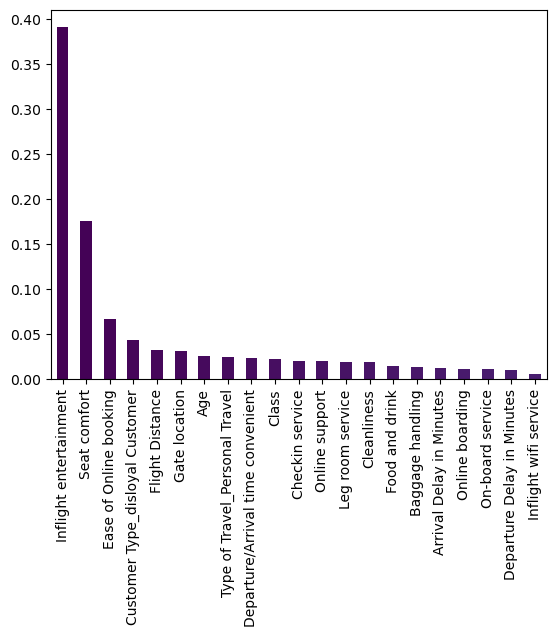

In [90]:
# calculate feature importance
importance = decision_tree.feature_importances_
forest_importance = pd.Series(importance, index = X.columns).sort_values(ascending = False)
colors = plt.cm.viridis(range(len(forest_importance)))
fig, ax = plt.subplots()
forest_importance.plot.bar(ax=ax, color=colors)
plt.show()

- The feature importance graph suggests that 'Inflight entertainment,' 'Seat comfort,' and 'Ease of Online booking' are the key features driving this model's predictions.